# Visualize all prediction accuracies from empirical analyses

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import os
os.environ['OMP_NUM_THREADS'] = str(1)
import statsmodels.sandbox.stats.multicomp as mc
import seaborn as sns
import h5py
import tools_group_rsa_python3 as tools_group
import nibabel as nib
import EmpiricalSRActFlow_ANN_RSA_v3 as esr
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "FreeSans"
import pandas as pd
import time
from importlib import reload

In [3]:
datadir = '/projects3/SRActFlow/data/results/GroupfMRI/RSA/predictionAccuracies/'
labels = ['Motor decoding', 'Motor decoding (null)', 
          'S-R Model', 'S-R Model (null)', 
          'FC shuffling', 'No ReLU',
          'Context lesion',
          'No hidden']

## Load in data
# Create data dict
acc_dict = {}
acc_dict['Hand'] = []
acc_dict['Model'] = []
acc_dict['Accuracy'] = []
##
# Motor decoding
rh = np.loadtxt(datadir + 'GroupfMRI1b_MotorResponseDecoding/RH_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI1b_MotorResponseDecoding/LH_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('Motor decoding')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('Motor decoding')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R Model 
rh = np.loadtxt(datadir + 'GroupfMRI15a_SRActFlow/RH_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI15a_SRActFlow/LH_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('S-R Model')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('S-R Model')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model no hidden layer
rh = np.loadtxt(datadir + 'GroupfMRI15d_I2Odirect/RH_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI15d_I2Odirect/LH_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('No hidden')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('No hidden')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model no threshold (null)
rh = np.loadtxt(datadir + 'GroupfMRI15e_SRActFlow_Control_NoThreshold/RH_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI15e_SRActFlow_Control_NoThreshold/LH_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('No ReLU')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('No ReLU')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model context lesion
rh = np.loadtxt(datadir + 'GroupfMRI15b_ContextLesions/RH_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI15b_ContextLesions/LH_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('Context lesion')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('Context lesion')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R connectivity shuffling (null)
rh = np.loadtxt(datadir + 'GroupfMRI15c_ConnectivityPermutation/PermutationTest_ConnectivityRewire_RH_all.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI15c_ConnectivityPermutation/PermutationTest_ConnectivityRewire_LH_all.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('FC shuffling')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('FC shuffling')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
    
df_acc = pd.DataFrame(data=acc_dict)

In [4]:
datadir = '/projects3/SRActFlow/data/results/GroupfMRI/RSA/predictionAccuracies/'
labels = ['Motor decoding', 'Motor decoding (null)', 
          'S-R Model', 'S-R Model (null)', 
          'FC shuffling', 'No ReLU',
          'Context lesion',
          'No hidden']

## Load in data
# Create data dict
acc_dict = {}
acc_dict['Hand'] = []
acc_dict['Model'] = []
acc_dict['Accuracy'] = []
##
# Motor decoding
rh = np.loadtxt(datadir + 'GroupfMRI1b_MotorResponseDecoding/RH_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI1b_MotorResponseDecoding/LH_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('Motor decoding')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('Motor decoding')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R Model 
rh = np.loadtxt(datadir + 'GroupfMRI15a_SRActFlow/RH_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI15a_SRActFlow/LH_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('S-R Model')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('S-R Model')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model no hidden layer
rh = np.loadtxt(datadir + 'GroupfMRI15d_I2Odirect/RH_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI15d_I2Odirect/LH_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('No hidden')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('No hidden')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model no threshold (null)
rh = np.loadtxt(datadir + 'GroupfMRI15e_SRActFlow_Control_NoThreshold/RH_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI15e_SRActFlow_Control_NoThreshold/LH_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('No ReLU')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('No ReLU')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model context lesion
rh = np.loadtxt(datadir + 'GroupfMRI15b_ContextLesions/RH_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI15b_ContextLesions/LH_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('Context lesion')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('Context lesion')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R connectivity shuffling (null)
rh = np.loadtxt(datadir + 'GroupfMRI15c_ConnectivityPermutation/PermutationTest_ConnectivityRewire_RH_all.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI15c_ConnectivityPermutation/PermutationTest_ConnectivityRewire_LH_all.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('FC shuffling')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('FC shuffling')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
    
df_acc_null = pd.DataFrame(data=acc_dict)

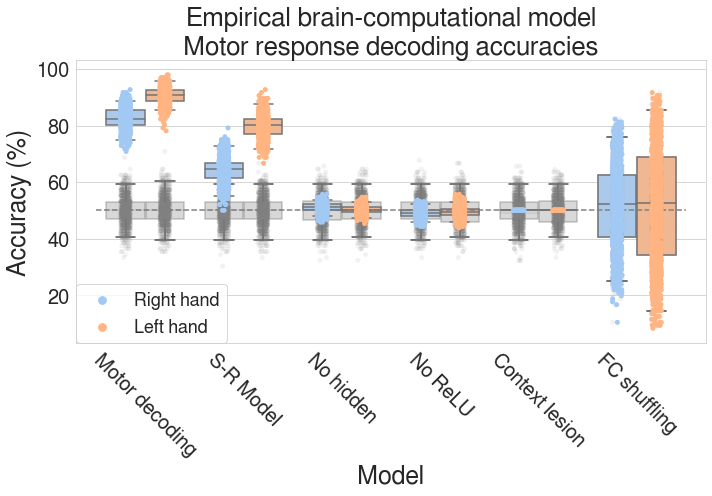

In [6]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Model",y="Accuracy",hue="Hand",data=df_acc_null,
           medianprops={'linestyle':'-','alpha':0.1},sym='',whis=[2.5,97.5],palette=['grey','grey'], boxprops=dict(alpha=.3))
ax = sns.stripplot(x="Model",y="Accuracy",hue="Hand",data=df_acc_null,
              dodge=True,alpha=0.1,palette=['grey','grey'])
ax = sns.boxplot(x="Model",y="Accuracy",hue="Hand",data=df_acc,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
ax = sns.stripplot(x="Model",y="Accuracy",hue="Hand",data=df_acc,
              dodge=True,palette="pastel")
plt.plot(np.arange(-0.5, 6.5),np.repeat(50.0,7),'grey',linestyle='--',label='Chance - 50%')
plt.xticks(rotation=-45,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy (%)',fontsize=25)
plt.xlabel('Model', fontsize=25)
plt.title('Empirical brain-computational model\nMotor response decoding accuracies', fontsize=26)
handles, labels = ax.get_legend_handles_labels()

l = plt.legend(handles[-2:], labels[-2:], loc=3, borderaxespad=0., prop={'size': 18})
plt.tight_layout()
plt.savefig('SummaryDecodingFigure.png',dpi=300)

## Perform statistical tests and print table

In [7]:
index = ['Accuracy (RH)', 'P-value (RH)', 'Accuracy (LH)', 'P-value (LH)']
df_stats = {}
#### Motor decoding
df_stats['Motor decoding'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='Motor decoding']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='Motor decoding']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='Motor decoding']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['Motor decoding'].append(round(acc_rh,2))
df_stats['Motor decoding'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='Motor decoding']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='Motor decoding']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='Motor decoding']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['Motor decoding'].append(round(acc_lh,2))
df_stats['Motor decoding'].append(pval_lh)

#### S-R Model
df_stats['S-R Model'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='S-R Model']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='S-R Model']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='S-R Model']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['S-R Model'].append(round(acc_rh,2))
df_stats['S-R Model'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='S-R Model']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='S-R Model']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='S-R Model']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['S-R Model'].append(round(acc_lh,2))
df_stats['S-R Model'].append(pval_lh)

#### No hidden
df_stats['No hidden'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='No hidden']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='No hidden']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='No hidden']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['No hidden'].append(round(acc_rh,2))
df_stats['No hidden'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='No hidden']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='No hidden']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='No hidden']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['No hidden'].append(round(acc_lh,2))
df_stats['No hidden'].append(pval_lh)

#### No ReLU
df_stats['No ReLU'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='No ReLU']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='No ReLU']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='No ReLU']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['No ReLU'].append(round(acc_rh,2))
df_stats['No ReLU'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='No ReLU']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='No ReLU']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='No ReLU']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['No ReLU'].append(round(acc_lh,2))
df_stats['No ReLU'].append(pval_lh)

#### Context lesion
df_stats['Context lesion'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='Context lesion']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='Context lesion']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='Context lesion']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['Context lesion'].append(round(acc_rh,2))
df_stats['Context lesion'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='Context lesion']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='Context lesion']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='Context lesion']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['Context lesion'].append(round(acc_lh,2))
df_stats['Context lesion'].append(pval_lh)

#### FC shuffling
df_stats['FC shuffling'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='FC shuffling']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='FC shuffling']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='FC shuffling']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['FC shuffling'].append(round(acc_rh,2))
df_stats['FC shuffling'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='FC shuffling']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='FC shuffling']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='FC shuffling']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['FC shuffling'].append(round(acc_lh,2))
df_stats['FC shuffling'].append(pval_lh)


df_stats = pd.DataFrame.from_dict(df_stats, orient='index', columns=index)

df_stats


,Accuracy (RH),P-value (RH),Accuracy (LH),P-value (LH)
Motor decoding,82.55,0.000,90.40,0.000
S-R Model,64.00,0.004,79.81,0.000
No hidden,50.86,0.445,50.17,0.456
No ReLU,48.99,0.534,49.53,0.532
Context lesion,50.00,0.427,50.00,0.462
FC shuffling,51.57,0.523,51.37,0.518


#### p-value of S-R model relative to FC shuffling?

In [300]:
sr_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='S-R Model']
tmp_rh_null = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='FC shuffling']
acc_rh = np.mean(sr_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
print('RH:', 100.0-pval_rh*100.0, '% percentile')

sr_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='S-R Model']
tmp_lh_null = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='FC shuffling']
acc_lh = np.mean(sr_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
print('LH:', 100.0-pval_lh*100.0, '% percentile')

RH: 78.8 % percentile
LH: 91.7 % percentile


___

# 10-40 hidden layers

In [281]:
datadir = '/projects3/SRActFlow/data/results/GroupfMRI/RSA/predictionAccuracies/'
labels = ['Motor decoding', 'Motor decoding (null)', 
          'S-R Model', 'S-R Model (null)', 
          'FC shuffling', 'No ReLU',
          'Context lesion',
          'No hidden']

## Load in data
# Create data dict
acc_dict = {}
acc_dict['Hand'] = []
acc_dict['Model'] = []
acc_dict['Accuracy'] = []
##
# S-R Model 10 hidden
rh = np.loadtxt(datadir + 'GroupfMRI15a_SRActFlow/RH_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI15a_SRActFlow/LH_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('10 Hidden (Original)')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('10 Hidden (Original)')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model 20 hidden
rh = np.loadtxt(datadir + 'GroupfMRI16b_AlterHidden/RH_20hidden_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI16b_AlterHidden/LH_20hidden_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('20 Hidden')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('20 Hidden')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model 30 hidden
rh = np.loadtxt(datadir + 'GroupfMRI19a/RH_30hidden_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI19a/LH_30hidden_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('30 Hidden')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('30 Hidden')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model 40 hidden
rh = np.loadtxt(datadir + 'GroupfMRI19a/RH_40hidden_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI19a/LH_40hidden_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('40 Hidden')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('40 Hidden')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
    
df_acc = pd.DataFrame(data=acc_dict)

In [282]:
datadir = '/projects3/SRActFlow/data/results/GroupfMRI/RSA/predictionAccuracies/'
labels = ['Motor decoding', 'Motor decoding (null)', 
          'S-R Model', 'S-R Model (null)', 
          'FC shuffling', 'No ReLU',
          'Context lesion',
          'No hidden']

## Load in data
# Create data dict
acc_dict = {}
acc_dict['Hand'] = []
acc_dict['Model'] = []
acc_dict['Accuracy'] = []
##
# S-R Model 10 hidden
rh = np.loadtxt(datadir + 'GroupfMRI15a_SRActFlow/RH_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI15a_SRActFlow/LH_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('10 Hidden (Original)')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('10 Hidden (Original)')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model 20 hidden
rh = np.loadtxt(datadir + 'GroupfMRI16b_AlterHidden/RH_20hidden_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI16b_AlterHidden/LH_20hidden_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('20 Hidden')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('20 Hidden')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model 30 hidden
rh = np.loadtxt(datadir + 'GroupfMRI19a/RH_30hidden_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI19a/LH_30hidden_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('30 Hidden')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('30 Hidden')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model 40 hidden
rh = np.loadtxt(datadir + 'GroupfMRI19a/RH_40hidden_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'GroupfMRI19a/LH_40hidden_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('40 Hidden')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('40 Hidden')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
    
df_acc_null = pd.DataFrame(data=acc_dict)

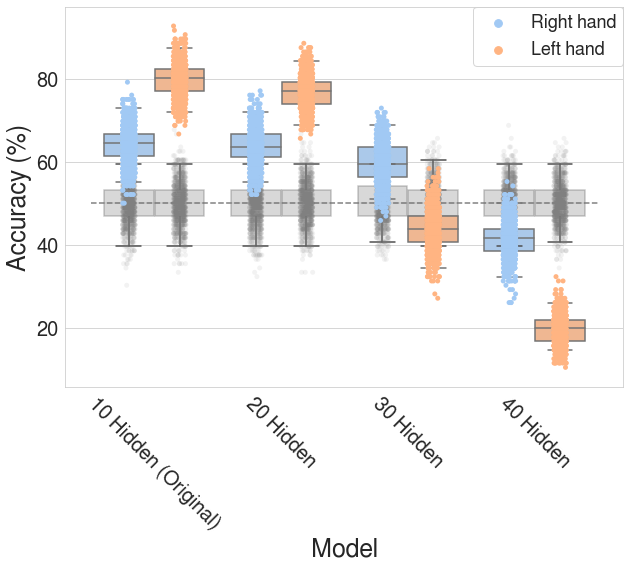

In [283]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Model",y="Accuracy",hue="Hand",data=df_acc_null,
           medianprops={'linestyle':'-','alpha':0.1},sym='',whis=[2.5,97.5],palette=['grey','grey'], boxprops=dict(alpha=.3))
ax = sns.stripplot(x="Model",y="Accuracy",hue="Hand",data=df_acc_null,
              dodge=True,alpha=0.1,palette=['grey','grey'])
ax = sns.boxplot(x="Model",y="Accuracy",hue="Hand",data=df_acc,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
ax = sns.stripplot(x="Model",y="Accuracy",hue="Hand",data=df_acc,
              dodge=True,palette="pastel")
plt.plot(np.arange(-0.5, 4.5),np.repeat(50.0,5),'grey',linestyle='--',label='Chance - 50%')
plt.xticks(rotation=-45,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy (%)',fontsize=25)
plt.xlabel('Model', fontsize=25)
handles, labels = ax.get_legend_handles_labels()

l = plt.legend(handles[-2:], labels[-2:], loc=1, borderaxespad=0., prop={'size': 18})

In [284]:
index = ['Accuracy (RH)', 'P-value (RH)', 'Accuracy (LH)', 'P-value (LH)']
df_stats = {}
#### 10 Hidden (Original)
df_stats['10 Hidden (Original)'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='10 Hidden (Original)']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='10 Hidden (Original)']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='10 Hidden (Original)']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['10 Hidden (Original)'].append(acc_rh)
df_stats['10 Hidden (Original)'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='10 Hidden (Original)']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='10 Hidden (Original)']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='10 Hidden (Original)']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['10 Hidden (Original)'].append(acc_lh)
df_stats['10 Hidden (Original)'].append(pval_lh)

#### 20 Hidden
df_stats['20 Hidden'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='20 Hidden']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='20 Hidden']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='15 Hidden']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['20 Hidden'].append(acc_rh)
df_stats['20 Hidden'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='20 Hidden']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='20 Hidden']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='20 Hidden']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['20 Hidden'].append(acc_lh)
df_stats['20 Hidden'].append(pval_lh)

#### 30 Hidden
df_stats['30 Hidden'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='30 Hidden']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='30 Hidden']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='30 Hidden']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['30 Hidden'].append(acc_rh)
df_stats['30 Hidden'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='30 Hidden']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='30 Hidden']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='30 Hidden']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['30 Hidden'].append(acc_lh)
df_stats['30 Hidden'].append(pval_lh)

#### 40 Hidden
df_stats['40 Hidden'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='40 Hidden']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='40 Hidden']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='40 Hidden']
acc_rh = np.mean(tmp_rh.Accuracy.values)
pval_rh = np.mean(acc_rh<tmp_rh_null.Accuracy.values)
df_stats['40 Hidden'].append(acc_rh)
df_stats['40 Hidden'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='40 Hidden']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='40 Hidden']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='40 Hidden']
acc_lh = np.mean(tmp_lh.Accuracy.values)
pval_lh = np.mean(acc_lh<tmp_lh_null.Accuracy.values)
df_stats['40 Hidden'].append(acc_lh)
df_stats['40 Hidden'].append(pval_lh)

df_stats = pd.DataFrame.from_dict(df_stats, orient='index', columns=index)

df_stats


/home/tito/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tito/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Accuracy (RH),P-value (RH),Accuracy (LH),P-value (LH)
10 Hidden (Original),63.996875,0.004,79.806250,0.000
20 Hidden,63.896875,NaN,76.945833,0.000
30 Hidden,59.832292,0.024,43.542708,0.917
40 Hidden,41.204167,0.956,19.596875,1.000
